## ___Feature Selection with Embedded Method___

_Embedded methods complete the feature selection process within the construction of the machine learning algorithm itself. In other words, they perform feature selection during the model training, which is why we call them embedded methods._

_A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification/regression at the same time._

_The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages._

_Here’s how:_
* _They take into consideration the interaction of features like wrapper methods do._
* _They are faster like filter methods._
* _They are more accurate than filter methods._
* _They find the feature subset for the algorithm being trained._
* _They are much less prone to overfitting._

#### ___Embedded Methods: Process___

_Any and all embedded methods work as follows:_
* _First, these methods train a machine learning model._
* _They then derive feature importance from this model, which is a measure of how much is feature important when making a prediction._
* _Finally, they remove non-important features using the derived feature importance._

_Embedded feature selection techniques:_ 
1. ___Regularization - L1 and L2___
2. ___Tree-based methods___

### ___1. Regularization___

_Regularization in machine learning adds a penalty to the different parameters of a model to reduce its freedom. This penalty is applied to the coefficient that multiplies each of the features in the linear model, and is done to avoid overfitting, make the model robust to noise, and to improve its generalization._

_Basic Assumptions:_
1. _Linear relationship with the target y._
2. _Feature space in X should have gaussian distribution._
3. _Features are not correlated with each other._
4. _Features are in same scale i.e. same variance._


_There are three main types of regularization for linear models:_
1. ___Lasso(Least Absolute Shrinkage and Selection Operator) Regression or L1 regularization___

_L1 regularization has shrinks some of the coefficients to zero, therefore indicating that a certain predictor or certain features will be multiplied by zero to estimate the target. Thus, it won’t be added to the final prediction of the target—this means that these features can be removed because they aren’t contributing to the final prediction._

_L1-Regularization adds a penalty equal to sum of absolute value of coefficients multiplied by lambda._

_Robust to Outliers_

_Has a sparse solution_

_Has built in feature selection_

_Generates simple and interpretable models, but cannot learn complex patterns._

2. ___Ridge Regression or L2 regularization___

_L2 regularization, on the other hand, doesn’t set the coefficient to zero, but only approaching zero—that’s why we use only L1 in feature selection._

_L2-Regularization adds a penalty equal to sum of squared value of coefficients multiplied by lambda._

_Not Robust to outliers_

3. ___Elastic Nets or L1/L2 regularization___

_L1/L2 regularization is a combination of the L1 and L2. It incorporates their penalties, and therefore we can end up with features with zero as a coefficient—similar to L1._

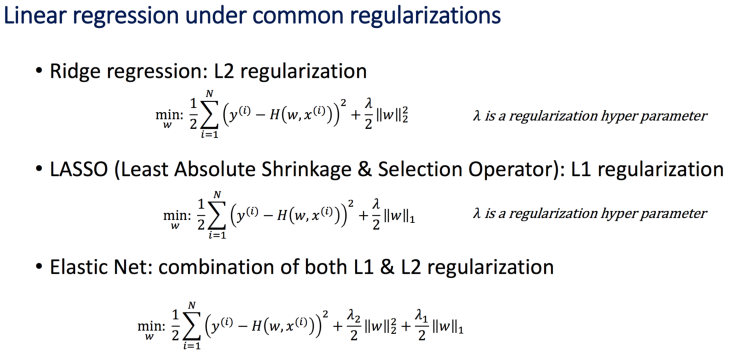

___If value of λ is high:___

* _More penalty being added_

* _High Bias, Low Variance - Underfitting_

___If value of λ is low:___

* _Less penalty being added_

* _Low Bias, High Variance - Overfitting_

* _Lesser Generalized Model_
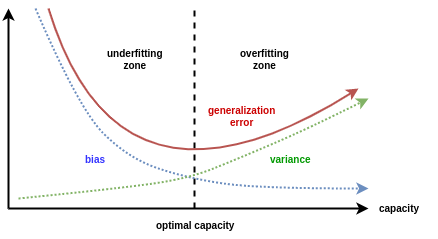


### ___2. Tree-based Feature Importance___
_Tree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive performance but can also provide us with what we call feature importance as a way to select features._

___Feature Importance___

_Feature importance tells us which variables are more important in making accurate predictions on the target variable/class. In other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target.
Random forests provide us with feature importance using straightforward methods — mean decrease impurity and mean decrease accuracy._

___How it Works___

_A random forest is no more than a group of decision trees. Each of them is established over a random extraction of samples and features from the dataset, so an individual tree isn't able to see all the features or access all the observations._

_Furthermore, every node in a decision tree is a condition on one feature—these nodes are designed to split the dataset into two different sets. Similar observation values will be in the same set, and different ones will be in the other._

_Thus, the importance of each feature is derived by how “pure” each of the sets is._

_The measure based on which optimal condition is chosen is known as an impurity. For classification, it’s typically either the Gini impurity or information gain/entropy; and for regression trees, it’s the variance._

_Thus, when training a tree, feature importance is calculated as the decrease in node impurity weighted in a tree. The higher the value, the more important the feature._

In [4]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score

In [8]:
titanic = sns.load_dataset('titanic')

In [9]:
# taking categorical variable
data = titanic[['pclass','sex','sibsp','parch', 'embarked','who','alone','survived']]
data.dropna(inplace = True)

In [10]:
data_x = data[['pclass','sex','sibsp','parch', 'embarked','who','alone']]
data_y = data['survived']

In [11]:
sex = {'male':0, 'female':1}
ports = {'S':0, 'C':1,'Q':2}
who = {'man':0, 'woman':1,'child':2}
alone = {True:0, False:1}

data_x['sex'] = data_x['sex'].map(sex)
data_x['embarked'] = data_x['embarked'].map(ports)
data_x['who'] = data_x['who'].map(who)
data_x['alone'] = data_x['alone'].map(alone)

In [12]:
data_x.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,1
1,1,1,1,0,1,1,1
2,3,1,0,0,0,1,0
3,1,1,1,0,0,1,1
4,3,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, test_size = 0.2, random_state = 0)

### ___Estimation of coefficient using Linear Regression___

In [14]:
sel = SelectFromModel(LinearRegression()) # works on selecting the paramter based on the Threshold, by default is mean of coeff.
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [16]:
sel.get_support()

array([ True,  True, False, False, False,  True, False])

In [17]:
sel.estimator_.coef_

array([-0.1465448 ,  0.32116345, -0.08154868, -0.05642944,  0.06482235,
        0.24199831,  0.09299509])

In [19]:
np.mean(np.abs(sel.estimator_.coef_))

0.14364315926685428

In [20]:
np.abs(sel.estimator_.coef_)

array([0.1465448 , 0.32116345, 0.08154868, 0.05642944, 0.06482235,
       0.24199831, 0.09299509])

In [23]:
features = X_train.columns[sel.get_support()]
features

Index(['pclass', 'sex', 'who'], dtype='object')

In [24]:
X_train_transform = sel.transform(X_train)
X_test_transform = sel.transform(X_test)

In [25]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [26]:
%time run_randomForest(X_train_transform,X_test_transform, y_train, y_test) # with selected Features

Accuracy:  0.7415730337078652
Wall time: 510 ms


In [27]:
%time run_randomForest(X_train,X_test, y_train, y_test) # with all Features

Accuracy:  0.7359550561797753
Wall time: 379 ms


### ___Estimation using Lasso Regression___

In [56]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
  
boston = load_boston()

scaler = StandardScaler()

X = scaler.fit_transform(boston["data"])

Y = boston["target"]

names = boston["feature_names"]
  
lasso = Lasso(alpha=.3)
lasso.fit(X, Y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso_coff = pd.Series(lasso.coef_, index = names)
lasso_coff

CRIM      -0.242279
ZN         0.081819
INDUS     -0.000000
CHAS       0.539872
NOX       -0.698913
RM         2.993230
AGE       -0.000000
DIS       -1.080913
RAD        0.000000
TAX       -0.000000
PTRATIO   -1.755612
B          0.628315
LSTAT     -3.704633
dtype: float64

In [62]:
lasso_coff[lasso_coff == 0] # coefficient brought down to 0.

INDUS   -0.0
AGE     -0.0
RAD      0.0
TAX     -0.0
dtype: float64

### ___Estimation using Ridge Regression___

In [64]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X,Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [67]:
ridge_coff = pd.Series(ridge.coef_, index = names)
ridge_coff.sort_values()

# INDUS     -0.041327
# AGE       -0.032383
# can be removed

LSTAT     -3.623942
DIS       -2.856756
PTRATIO   -1.987751
NOX       -1.812611
TAX       -1.565395
CRIM      -0.859051
INDUS     -0.041327
AGE       -0.032383
CHAS       0.707780
B          0.844709
ZN         0.954975
RAD        2.097823
RM         2.742344
dtype: float64

### ___Feature Selection using Logistic Regression with L1 Regularization___

In [30]:
# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))
selection.fit(X_train, y_train)
selection.get_support()

array([ True,  True,  True,  True,  True,  True, False])

In [31]:
selection.estimator_.coef_

array([[-0.7418254 ,  1.35285895, -0.33068005, -0.03154483,  0.2743721 ,
         1.25118109,  0.        ]])

In [32]:
# see the selected features.
selected_features = X_train.columns[(selection.get_support())]
selected_features

Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who'], dtype='object')

In [35]:
X_train_transform = selection.transform(X_train)
X_test_transform = selection.transform(X_test)

In [36]:
%time run_randomForest(X_train_transform,X_test_transform, y_train, y_test) # with selected Features

Accuracy:  0.7359550561797753
Wall time: 380 ms


### ___Feature Selection using Logistic Regression with L2 Regularization___

In [37]:
# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=0.05, penalty='l2', solver='liblinear'))
selection.fit(X_train, y_train)
selection.get_support()

array([ True,  True, False, False, False,  True, False])

In [38]:
selection.estimator_.coef_

array([[-0.69956159,  1.01933267, -0.35931976, -0.12299446,  0.32104968,
         1.10009637,  0.31330943]])

In [39]:
# see the selected features.
selected_features = X_train.columns[(selection.get_support())]
selected_features

Index(['pclass', 'sex', 'who'], dtype='object')

In [40]:
X_train_transform = selection.transform(X_train)
X_test_transform = selection.transform(X_test)

In [41]:
%time run_randomForest(X_train_transform,X_test_transform, y_train, y_test) # with selected Features

Accuracy:  0.7415730337078652
Wall time: 390 ms


### ___Tree-based Feature Importance___

In [43]:
# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=340)

# fit the model to start training.
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=340,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# get the importance of the resulting features.
importances = model.feature_importances_
importances

array([0.17203991, 0.23927445, 0.10485616, 0.06883207, 0.07754942,
       0.31252156, 0.02492644])

In [46]:
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
0.172040,pclass
0.239274,sex
0.104856,sibsp
0.068832,parch
0.077549,embarked
0.312522,who
0.024926,alone


In [47]:
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
final_df

,Features,Importances
6,alone,0.024926
3,parch,0.068832
4,embarked,0.077549
2,sibsp,0.104856
0,pclass,0.172040
1,sex,0.239274
5,who,0.312522


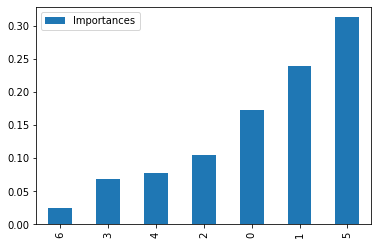

In [48]:
# plot the feature importances in bars.
final_df.plot.bar() 

In [51]:
features = final_df.loc[final_df.Importances>0.05, 'Features'].tolist()
features

['parch', 'embarked', 'sibsp', 'pclass', 'sex', 'who']

In [52]:
X_train_new = X_train[features]
X_test_new = X_test[features]

In [53]:
%time run_randomForest(X_train_new, X_test_new, y_train, y_test) # with selected Features

Accuracy:  0.7359550561797753
Wall time: 415 ms


_we can use any other tree-based algorithm the same way we did here. One of the best tree model types is gradient boosting algorithms (like XGBoost, CatBoost, and many more) since they provide accurate feature importance._